#Importing all neccesary librarys

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost

from sklearn import metrics
from sklearn.metrics import mean_squared_error

#1. Load and Explore Dataset

In [20]:
df = pd.read_csv('/content/drive/MyDrive/sync intern/week three/boston.csv')

In [21]:
df = df.rename(columns={'MEDV' : 'PRICE'})

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

##checking missing values

In [24]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

there is no missing values

## Finding out the correlation between the features

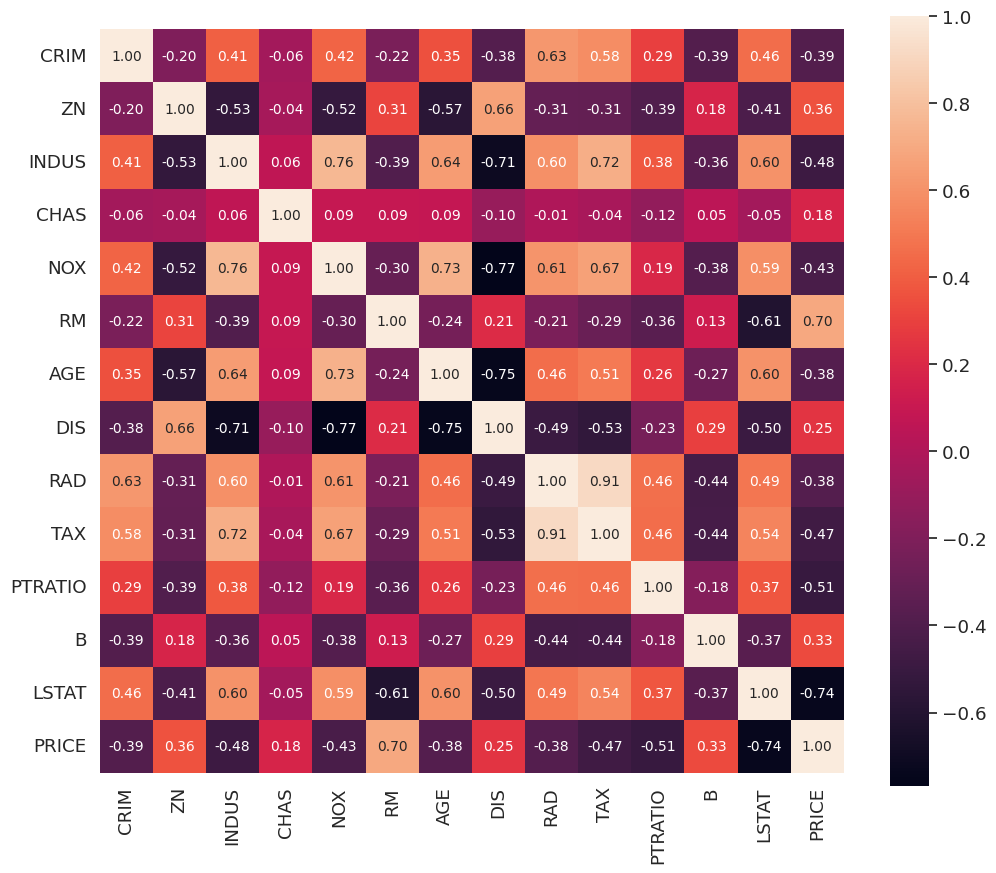

In [25]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10})
plt.show()

RM, PTRATIO, and LSTAT are highly correlated with PRICE (coefficient > 0.5 or < -0.5)

#2. Data Preparation

In [26]:
X = df.drop('PRICE', axis = 1).values
y = df['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
print("X train: ", X_train.shape )
print("X test: ", X_test.shape )

X train:  (404, 13)
X test:  (102, 13)


## Standardize features

In [28]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#3. Regression Analysis

##3.1 Linear regression




In [36]:
# Initiate the model
reg = LinearRegression()

# Fit the model
reg.fit(X_train, y_train)

# Cross validation
reg_cv_results_train = cross_val_score(reg, X_train, y_train, cv=5)
print("Linear Regression (Train): ", np.mean(reg_cv_results_train))

reg_cv_results_test = cross_val_score(reg, X_test, y_test, cv=5)
print("Linear Regression (Test): ", np.mean(reg_cv_results_test))

Linear Regression (Train):  0.7244357342240261
Linear Regression (Test):  0.5451790940964922


##3.2 Decision Tree Regression

In [37]:
# Initiate model
dt = DecisionTreeRegressor()

# Fit the model
dt.fit(X_train, y_train)

# Cross validation
dt_cv_results_train = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree (Train): ", np.mean(dt_cv_results_train))

dt_cv_results_test = cross_val_score(dt, X_test, y_test, cv=5)
print("Decision Tree (Test): ", np.mean(dt_cv_results_test))

Decision Tree (Train):  0.6222142350622551
Decision Tree (Test):  0.5797849413038002


##3.3 Random Forest Classifier

In [38]:
# Initiate model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Cross validation
rf_cv_results_train = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest (Train): ", np.mean(rf_cv_results_train))

rf_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("Random Forest (Test): ", np.mean(rf_cv_results_test))

Random Forest (Train):  0.8191041999832336
Random Forest (Test):  0.7166304097665593


##3.4 XGBoost Regresso

In [39]:
# Initiate model
xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Cross validation
xgb_cv_results_train = cross_val_score(xgb, X_train, y_train, cv=5)
print("XGBoost (Train): ", np.mean(xgb_cv_results_train))

xgb_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("XGBoost (Test): ", np.mean(xgb_cv_results_test))

XGBoost (Train):  0.8426447064853209
XGBoost (Test):  0.712017506630243


In [40]:
results_table = pd.DataFrame([[np.mean(reg_cv_results_train), np.mean(reg_cv_results_test)],
                             [np.mean(dt_cv_results_train), np.mean(dt_cv_results_test)],
                             [np.mean(rf_cv_results_train), np.mean(rf_cv_results_test)],
                             [np.mean(xgb_cv_results_train), np.mean(xgb_cv_results_test)]],
                            columns=['Train R2', 'Test R2'],
                            index=["Linear Regression","Decision Tree","Random Forest", "XGBoost Regressor"])
pd.options.display.precision = 3
results_table

,Train R2,Test R2
Linear Regression,0.724,0.545
Decision Tree,0.622,0.580
Random Forest,0.819,0.717
XGBoost Regressor,0.843,0.712


In [41]:
results_table['Difference'] = results_table['Train R2'] - results_table['Test R2']

In [42]:
results_table

,Train R2,Test R2,Difference
Linear Regression,0.724,0.545,0.179
Decision Tree,0.622,0.580,0.042
Random Forest,0.819,0.717,0.102
XGBoost Regressor,0.843,0.712,0.131


## 🎇All models seem to be overfitting but XGBoost Regressor achieved the best performance.